In [1]:
import csv
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import ceil, floor, sqrt
import glog as log
np.log10([1,10])

array([0., 1.])

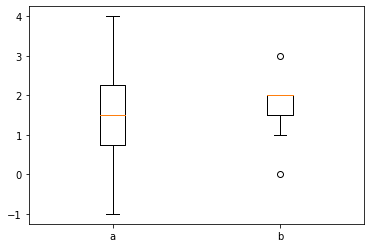

In [3]:
a = np.array([1,0,1,2,3,4,-1,2])
b = np.array([2,0,1,2,3,2,2])
plt.boxplot([a,b],labels=['a','b'])
plt.show()

In [4]:
def load(f):
    for i in f:
        return i

def get_nnz(f):
    row_offset = load(f)
    ans = []
    for i in range(1,len(row_offset)):
        ans.append(int(row_offset[i])-int(row_offset[i-1]))
    log.info(len(ans))
    return ans;
def get_xy(r):
    a = pd.Series(r)
    b = a.value_counts()
    yy = [] # Frequency
    for i in list(b.index):
        yy.append(b[i])
    yy = np.array(yy)
    yy = yy/yy.sum()  # Percentile
    xx = b.index      # NNZs
    ind = np.lexsort((yy,xx))
    x = [0]
    y = [0]
    
    for i in ind:
        x.append(xx[i])
        y.append(yy[i]+y[-1])
    return min(x),max(x),x,y

f = open('cora.csv','r')
f1 = csv.reader(f)
cora = get_nnz(f1)
f.close()

f = open('polblogs.csv','r')
f2 = csv.reader(f)
polblogs = get_nnz(f2)
f.close()

f = open('citeseer.csv','r')
f3 = csv.reader(f)
citeseer = get_nnz(f3)
f.close()

f = open('pubmed.csv','r')
f4 = csv.reader(f)
pubmed = get_nnz(f4)
f.close()

f = open('ppi.csv','r')
f5 = csv.reader(f)
ppi = get_nnz(f5)
f.close()

f = open('flickr.csv','r')
f6 = csv.reader(f)
flickr = get_nnz(f6)
f.close()

f = open('reddit.csv','r')
f7 = csv.reader(f)
reddit = get_nnz(f7)
f.close()

f = open('yelp.csv','r')
f8 = csv.reader(f)
yelp = get_nnz(f8)
f.close()

f = open('amazon.csv','r')
f9 = csv.reader(f)
amazon = get_nnz(f9)
f.close()


I0325 16:41:45.831375 15900 <ipython-input-4-789725c31dd8>:10] 2485
I0325 16:41:45.834352 15900 <ipython-input-4-789725c31dd8>:10] 1222
I0325 16:41:45.837452 15900 <ipython-input-4-789725c31dd8>:10] 2110
I0325 16:41:45.854785 15900 <ipython-input-4-789725c31dd8>:10] 19717
I0325 16:41:45.863211 15900 <ipython-input-4-789725c31dd8>:10] 14755
I0325 16:41:45.910189 15900 <ipython-input-4-789725c31dd8>:10] 89250
I0325 16:41:46.055327 15900 <ipython-input-4-789725c31dd8>:10] 232965
I0325 16:41:46.470766 15900 <ipython-input-4-789725c31dd8>:10] 716847
I0325 16:41:47.392026 15900 <ipython-input-4-789725c31dd8>:10] 1569960


0
169
0
0


W0325 17:00:10.538935 15900 warnings.py:109] <ipython-input-15-f2531a98008b>:22: RuntimeWarning: divide by zero encountered in log10
  plt.step(cora_y, np.log10(cora_x), label='cora')

I0325 17:00:10.552768 15900 <ipython-input-15-f2531a98008b>:23] 0
I0325 17:00:10.553159 15900 <ipython-input-15-f2531a98008b>:24] []
W0325 17:00:10.553637 15900 warnings.py:109] <ipython-input-15-f2531a98008b>:26: RuntimeWarning: divide by zero encountered in log10
  plt.step(polblogs_y, np.log10(polblogs_x), label='polblogs')

I0325 17:00:10.554603 15900 <ipython-input-15-f2531a98008b>:27] 0
I0325 17:00:10.555260 15900 <ipython-input-15-f2531a98008b>:28] []
W0325 17:00:10.555701 15900 warnings.py:109] <ipython-input-15-f2531a98008b>:30: RuntimeWarning: divide by zero encountered in log10
  plt.step(citeseer_y, np.log10(citeseer_x), label='citeseer')

I0325 17:00:10.556663 15900 <ipython-input-15-f2531a98008b>:31] 0
I0325 17:00:10.557035 15900 <ipython-input-15-f2531a98008b>:32] []
W0325 17:00:10.557484 

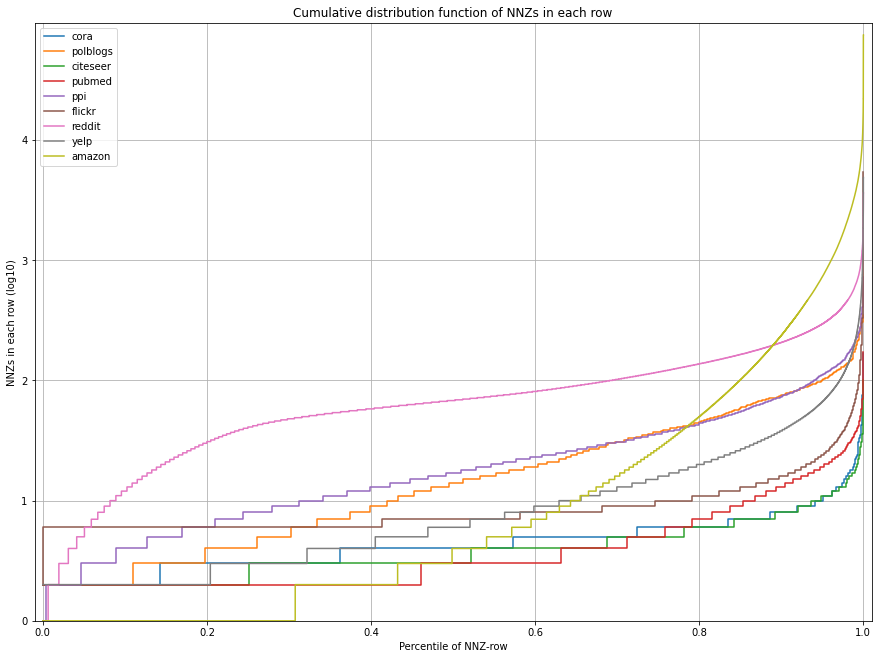

In [15]:
fig = plt.gcf()
fig.set_size_inches(15,11)


cora_mn, cora_mx, cora_x, cora_y = get_xy(cora)
print(cora_mn)
print(cora_mx)
print(cora_x[0])
print(cora_y[0])

polblogs_mn, polblogs_mx, polblogs_x, polblogs_y = get_xy(polblogs)
citeseer_mn, citeseer_mx, citeseer_x, citeseer_y = get_xy(citeseer)
pubmed_mn, pubmed_mx, pubmed_x, pubmed_y = get_xy(pubmed)
ppi_mn, ppi_mx, ppi_x, ppi_y = get_xy(ppi)
flickr_mn, flickr_mx, flickr_x, flickr_y = get_xy(flickr)
reddit_mn, reddit_mx, reddit_x, reddit_y = get_xy(reddit)
yelp_mn, yelp_mx, yelp_x, yelp_y = get_xy(yelp)
amazon_mn, amazon_mx, amazon_x, amazon_y = get_xy(amazon)
mn = min([cora_mn,polblogs_mn,citeseer_mn,pubmed_mn,ppi_mn,flickr_mn,reddit_mn,yelp_mn,amazon_mn])
mx = max([cora_mx,polblogs_mx,citeseer_mx,pubmed_mx,ppi_mx,flickr_mx,reddit_mx,yelp_mx,amazon_mx])

plt.step(cora_y, np.log10(cora_x), label='cora')
log.info(cora_mn)
log.info(cora_mx)

plt.step(polblogs_y, np.log10(polblogs_x), label='polblogs')
log.info(polblogs_mn)
log.info(polblogs_mx)

plt.step(citeseer_y, np.log10(citeseer_x), label='citeseer')
log.info(citeseer_mn)
log.info(citeseer_mx)

plt.step(pubmed_y, np.log10(pubmed_x), label='pubmed')
log.info(pubmed_mn)
log.info(pubmed_mx)

plt.step(ppi_y, np.log10(ppi_x), label='ppi')
log.info(ppi_mn)
log.info(ppi_mx)

plt.step(flickr_y, np.log10(flickr_x), label='flickr')
log.info(flickr_mn)
log.info(flickr_mx)

plt.step(reddit_y, np.log10(reddit_x), label='reddit')
log.info(reddit_mn)
log.info(reddit_mx)

plt.step(yelp_y, np.log10(yelp_x), label='yelp')
log.info(yelp_mn)
log.info(yelp_mx)

plt.step(amazon_y, np.log10(amazon_x), label='amazon')
log.info(amazon_mn)
log.info(amazon_mx)

plt.title('Cumulative distribution function of NNZs in each row')

plt.ylabel('NNZs in each row (log10)')

plt.xlabel('Percentile of NNZ-row')

plt.legend(loc='best')

plt.xlim([-0.01,1.01])

plt.ylim([np.log10(1), np.log10(mx)+0.1])

plt.grid()

plt.show()

In [63]:
def get_percentile(r):
    ans = []
    idx = np.array(r)
    ans.append(len(idx[idx<=4])/(len(r)))
    ans.append(len(idx[idx<=8])/(len(r)))
    ans.append(len(idx[idx<=16])/(len(r)))
    ans.append(len(idx[idx<=32])/(len(r)))
    ans.append(len(idx[idx<=64])/(len(r)))
    ans.append(len(idx[idx<=128])/(len(r)))
    return ans
#a = np.array([1,2,3,4,4,5,2])
#len(a[a>=0])/len(a)

print(get_percentile(amazon))

[0.5408437157634589, 0.6295714540497848, 0.7031421182705292, 0.7655831995719636, 0.8190189558969655, 0.8652417895997351]


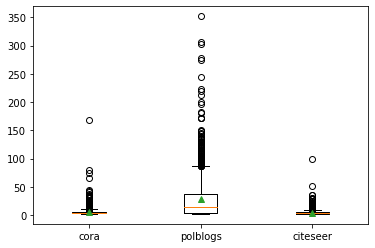

In [41]:

plt.boxplot([cora[1:],polblogs[1:],citeseer[1:]], 
            labels=['cora','polblogs','citeseer'],showmeans=True)
plt.show()

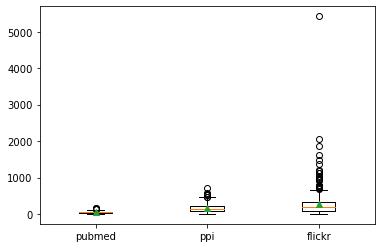

In [20]:
plt.boxplot([pubmed_x[1:],ppi_x[1:],flickr_x[1:]], 
            labels=['pubmed', 'ppi', 'flickr'], showmeans=True)
plt.show()

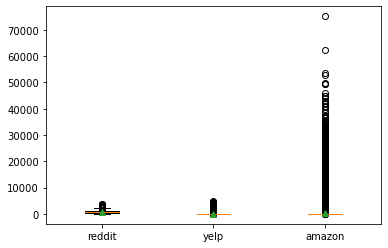

In [21]:
plt.boxplot([reddit_x[1:],yelp[1:],amazon[1:]], 
            labels=['reddit', 'yelp', 'amazon'], showmeans=True)
plt.show()

In [6]:
def pdf(x, mu=0, sigma=1):
    """
    Calculates the normal distribution's probability density
    function (PDF).
    """
    term1 = 1.0 / ( sqrt(2*np.pi) * sigma )
    term2 = np.exp( -0.5 * ( (x-mu)/sigma )**2 )
    return term1 * term2

In [7]:
data1 = np.random.normal(loc=0, scale=5.0, size=30)

data2 = np.random.normal(loc=2, scale=7.0, size=30)

data1.sort(), data2.sort()

min_val = floor(min(data1+data2))

max_val = ceil(max(data1+data2))
print(data1)
print(data1[[-1]])



[-8.92534118e+00 -8.19963890e+00 -8.28683070e-01 -6.80751132e-01
 -4.97177451e-01 -3.98420054e-01 -6.91358736e-02 -1.04759322e-02
  4.73489437e-01  1.00731089e+00  1.16272771e+00  1.26070324e+00
  1.74972787e+00  2.36095890e+00  2.37115175e+00  2.66760627e+00
  2.87291794e+00  2.92191993e+00  2.95087073e+00  3.43099192e+00
  3.75373885e+00  5.41390476e+00  5.98633079e+00  6.38810582e+00
  6.79945827e+00  7.41570584e+00  7.46921946e+00  8.80162915e+00
  8.96007221e+00  1.10332815e+01]
[11.03328146]


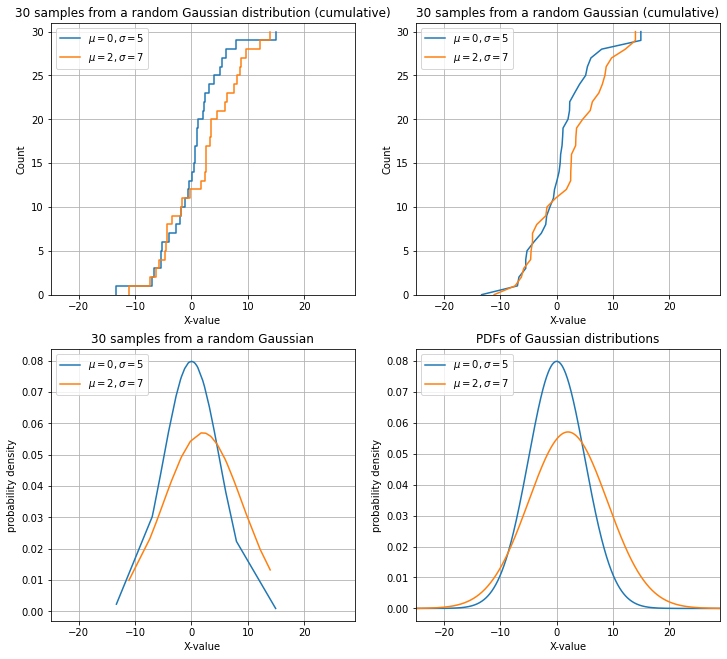

In [5]:
fig = plt.gcf()

fig.set_size_inches(12,11)

# Cumulative distributions, stepwise:

plt.subplot(2,2,1)

plt.step(np.concatenate([data1, data1[[-1]]]), np.arange(data1.size+1), label='$\mu=0, \sigma=5$')

plt.step(np.concatenate([data2, data2[[-1]]]), np.arange(data2.size+1), label='$\mu=2, \sigma=7$')

plt.title('30 samples from a random Gaussian distribution (cumulative)')

plt.ylabel('Count')

plt.xlabel('X-value')

plt.legend(loc='upper left')

plt.xlim([min_val, max_val])

plt.ylim([0, data1.size+1])

plt.grid()

# Cumulative distributions, smooth:

plt.subplot(2,2,2)

plt.plot(np.concatenate([data1, data1[[-1]]]), np.arange(data1.size+1), label='$\mu=0, \sigma=5$')

plt.plot(np.concatenate([data2, data2[[-1]]]), np.arange(data2.size+1), label='$\mu=2, \sigma=7$')

plt.title('30 samples from a random Gaussian (cumulative)')

plt.ylabel('Count')

plt.xlabel('X-value')

plt.legend(loc='upper left')

plt.xlim([min_val, max_val])

plt.ylim([0, data1.size+1])

plt.grid()

# Probability densities of the sample points function

plt.subplot(2,2,3)

pdf1 = pdf(data1, mu=0, sigma=5)

pdf2 = pdf(data2, mu=2, sigma=7)

plt.plot(data1, pdf1, label='$\mu=0, \sigma=5$')

plt.plot(data2, pdf2, label='$\mu=2, \sigma=7$')

plt.title('30 samples from a random Gaussian')

plt.legend(loc='upper left')

plt.xlabel('X-value')

plt.ylabel('probability density')

plt.xlim([min_val, max_val])

plt.grid()

# Probability density function

plt.subplot(2,2,4)

x = np.arange(min_val, max_val, 0.05)

pdf1 = pdf(x, mu=0, sigma=5)

pdf2 = pdf(x, mu=2, sigma=7)

plt.plot(x, pdf1, label='$\mu=0, \sigma=5$')

plt.plot(x, pdf2, label='$\mu=2, \sigma=7$')

plt.title('PDFs of Gaussian distributions')

plt.legend(loc='upper left')

plt.xlabel('X-value')

plt.ylabel('probability density')

plt.xlim([min_val, max_val])

plt.grid()

plt.show()